In [1]:
using CovidSim

┌ Info: Precompiling CovidSim [top-level]
└ @ Base loading.jl:1260


In [67]:
using DelimitedFiles
using DataFrames
using Plots
pyplot()

Plots.PyPlotBackend()

## Comparing Simulation to Johns Hopkins Reported Data
### Seattle (Really, King County)

In [15]:
jhcases,jhfirst, jhlast = get_real_data()
jhdead, _, _ = get_real_data(series="dead")

(dat = (dat = Any[60.0 "American Samoa, US" … 0 0; 66.0 "Guam, US" … 5 5; … ; "" "Weber-Morgan, Utah, US" … 2 2; 90049.0 "Southwest, Utah, US" … 0 0], first = CovidSim.Col_ref("1/22/20", 3), last = CovidSim.Col_ref("4/30/20", 102)), first = first, last = last)

In [14]:
println(jhcases.first, " ", jhdata.last)

CovidSim.Col_ref("1/22/20", 3) CovidSim.Col_ref("4/30/20", 102)


We want column 13 through the end:  Feb. 1 to April 30

Get our locales.

In [19]:
geo = CovidSim.readgeodata("../data/geo2data.csv")
geo[:,1:7]

15×7 Array{Any,2}:
  1   6075  "San Francisco"  "San Francisco"  "CA"  2   881549
  2  53033  "Seattle"        "Seattle"        "WA"  2  2252782
  3  36061  "New York"       "New York"       "NY"  1  5803210
  4  39035  "Cuyahoga"       "Cleveland"      "OH"  2  1235072
  5  48113  "Dallas"         "Dallas"         "TX"  2  2635516
  6  39151  "Stark"          "Canton"         "OH"  3   370606
  7  34013  "Essex"          "Newark"         "NJ"  3   798975
  8  13089  "DeKalb"         "Atlanta"        "GA"  2  1063937
  9  17167  "Sangamon"       "Springfield"    "IL"  3   194672
 10  38015  "Burleigh"       "Bismarck"       "ND"  3    95626
 11   4013  "Maricopa"       "Phoenix"        "AZ"  1  4485414
 12  42003  "Allegheny"      "Pittsburgh"     "PA"  2  1216045
 13  27053  "Hennepin"       "Minneapolis"    "MN"  2  1265843
 14  31055  "Douglas"        "Omaha"          "NE"  2   571327
 15   8031  "Denver"         "Denver"         "CO"  2   727211

In [144]:
seattle = (fips=53033, id=2); nyc=(fips=36061, id=3); bismarck=(fips=38015,id=10)

(fips = 38015, id = 10)

In [27]:
sea = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=seattle.fips)
rename!(sea, [:sea_infected, :sea_dead])
nyc = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=newyork.fips)
rename!(nyc, [:nyc_infected, :nyc_dead])
bis = loc2df(confdat=jhcases.dat, deaddat=jhdead.dat, loc=bismarck.fips)
rename!(bis, [:bis_infected, :bis_dead])
tricities = hcat(sea, nyc, bis)

,sea_infected,sea_dead,nyc_infected,nyc_dead,bis_infected,bis_dead
,Any,Any,Any,Any,Any,Any
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


#### Run a simulation for the tricities

In [29]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim.var"#scase#75"{CovidSim.var"#scase#74#76"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}}) (generic function with 1 method)

In [163]:
alldict, env, series = run_a_sim(100,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 100 days.


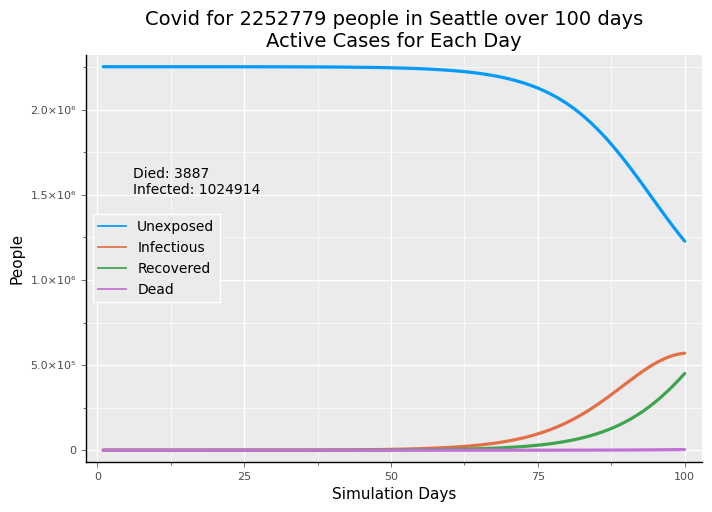

In [164]:
cumplot(series,seattle.id,geo=geo)

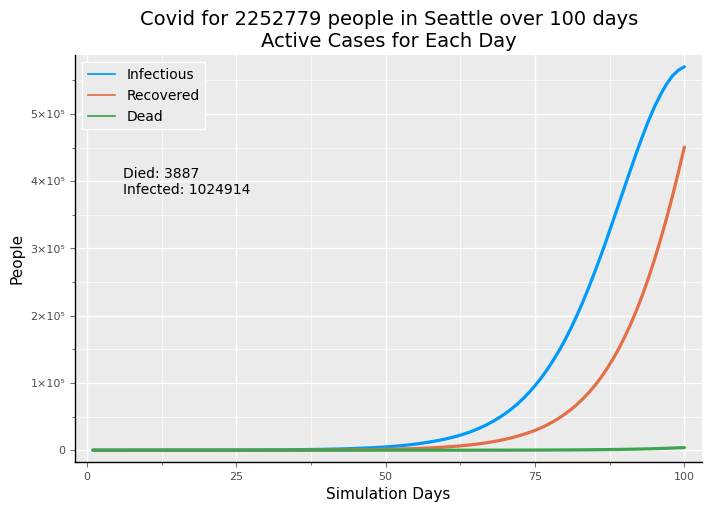

In [165]:
cumplot(series,seattle.id,[infectious, recovered, dead],geo=geo)

#### Let's put some moderate social distancing in place around March 23
This reduces R0 from around 2.0 to around 1.2. Still, some growth but much slower...

In [166]:
str_50 = sd_gen(start=50, comply=.8, cf=(.2,1.3), tf=(.18,.45))

(::CovidSim.var"#sd_mod#88"{CovidSim.var"#sd_mod#87#89"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [167]:
sim_r0(env=env)

1.0

In [168]:
alldict, env, series = run_a_sim(100,seattle.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 2....
Simulation completed for 100 days.


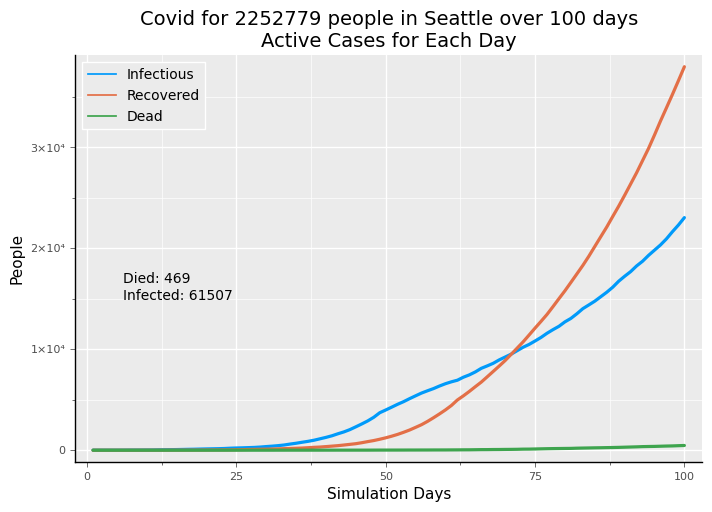

In [169]:
cumplot(series,seattle.id,[infectious, recovered, dead],geo=geo)

#### What is the difference between active cases and reported cases?

In [170]:
series[2][:cum][:,[map2series.infectious[6], map2series.totinfected[6]]]

100×2 Array{Int64,2}:
     6      6
     6      6
     6      6
     7      7
     7      7
    10     10
    15     15
    18     18
    21     23
    25     27
    28     30
    42     44
    49     51
     ⋮  
 16743  41204
 17235  42794
 17694  44386
 18258  46084
 18725  47779
 19305  49575
 19824  51437
 20339  53351
 20943  55284
 21650  57328
 22311  59373
 23046  61513

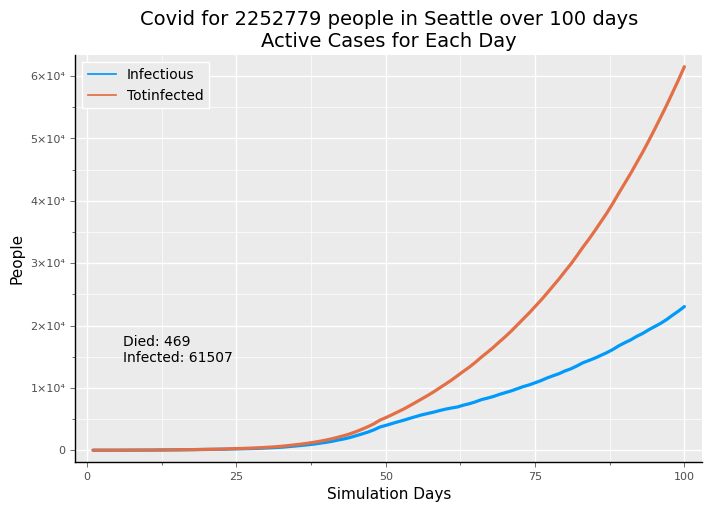

In [171]:
cumplot(series,seattle.id,[infectious, totinfected], geo=geo)

#### What's going on here?
Infectious shows the *active* cases: the people on each day who are, on that day, infected. This means that people who have recovered or, sadly, have died are not included--they're not active any more.

Totinfected shows the cumulative total of all the people who have ever become infected. This is what popular web dashboards and news sites show to depict growth and compare different places. Why don't they show *active* infected cases?  ...because they can't... They could subtract out the reported deaths, but that wouldn't make much difference, except in Italy or New York City. They don't know how many people have recovered because no public health jurisdiction accurately tracks this data.  When "anti-body" tests are reliably accurate and broadly available, then a few jurisdictions may begin to sample the population with anti-body tests. They will obtain an estimate of the percentage of the population that contracted and recovered from Coronavirus.

Total cumulative infected is easier to track, if not accurately, and easier to compare across locations. In the early stages of the spread of infection, it focuses on what everyone wants to know: is the virus growing and how fast is it growing.  It tends to exaggerate the state of things because the line goes up steeply and never goes down--it can only become flat. 

Active infected cases *will* go down and it shows the effect of so-called herd immunity: When there are many recovered and temporarily and partially immune people in the population, the virus spread slows down because there are fewer hosts available. Eventually, this will protect many other people as the spread becomes very slow and active virus in hosts dies out.

#### Simulated vs. Reported Cases

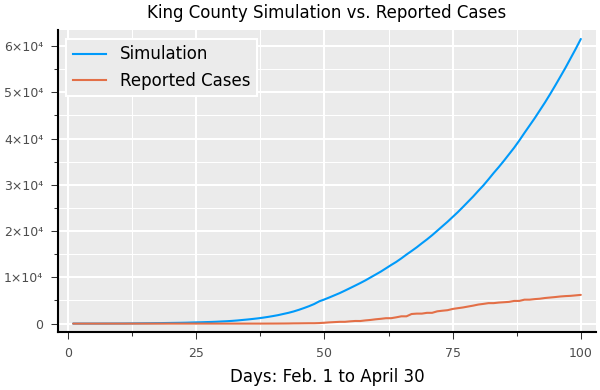

In [172]:
plot(1:100, series[2][:cum][:,map2series.totinfected[6]], label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:100, tricities[:,:sea_infected], label="Reported Cases",dpi=150, size=(400,260), tickfontsize=6)
title!("King County Simulation vs. Reported Cases", titlefontsize=8)
xlabel!("Days: Feb. 1 to April 30", guidefontsize=8)


#### Which do you believe?
Is this plausible?  Let's think about it.  The simulation with social distancing results in about 91,000 cumulative total infected and 772 deaths for a death rate of 8 tenths of one percent. The reported results show only 6207 cumulative total infected and 447 deaths for a death rate of over 7%. 

Could we have unreported deaths in Seattle?  Even in the place with possibly the best and most honest approach to public health in the US, sure... Is it reasonable that Seattle's death rate is comparable to Italy's? Probably not. Let's split the difference on deaths and call it 600. Let's assume a moderately high death rate of 2%. This would mean Seattle really has 30,000 cases--so Seattle is underreporting by a factor of 5 and the simulation would be showing 3X the number cases rather than around 12X.

Even so, doesn't the simulation still seem too high?  The simulated infection rate is only at 4% of King County's population. That doesn't seem outrageous--in fact, it is probably still too low. The good news is that the real death rate is probably significantly lower than Seattle's reported death rate and King County is building towards "herd immunity" more rapidly than the reported cases would suggest.

This phenomenon is happening around the world with a respected article based estimating cases based on more accurate reported deaths. The article suggests that under-reporting in countries varies from 3X to more than 12X. 

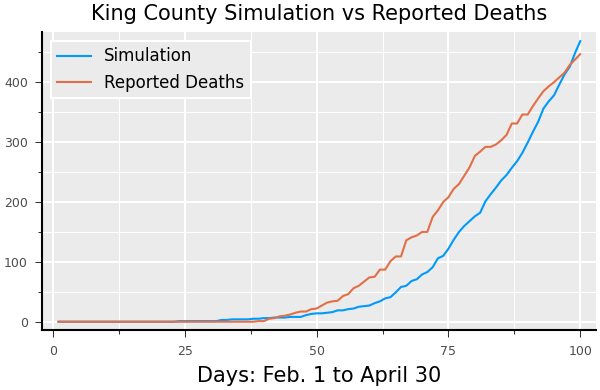

In [173]:
plot(1:100, series[2][:cum][:,map2series.dead[6]], label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:100, tricities[:,:sea_dead], label="Reported Deaths",dpi=150, size=(400,260), tickfontsize=6)
title!("King County Simulation vs Reported Deaths", titlefontsize=10)
xlabel!("Days: Feb. 1 to April 30", guidefontsize=10)

### Virtual New York City

In [174]:
alldict, env, series = run_a_sim(100, nyc.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 3....
Simulation completed for 100 days.


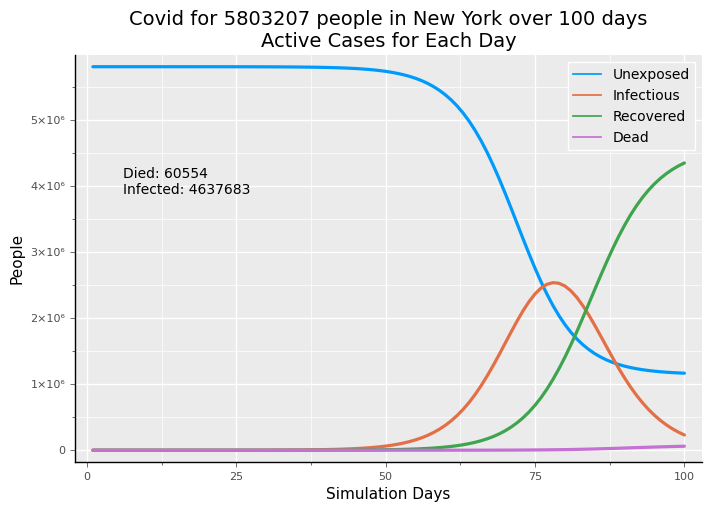

In [175]:
cumplot(series,nyc.id,geo=geo)

Why does New York grow much faster than Seattle? Because it has a much higher population density.  The simulation uses population density as an input that influences the spread of the virus.

In [176]:
alldict, env, series = run_a_sim(100,nyc.id, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 3....
Simulation completed for 100 days.


### With Social Distancing

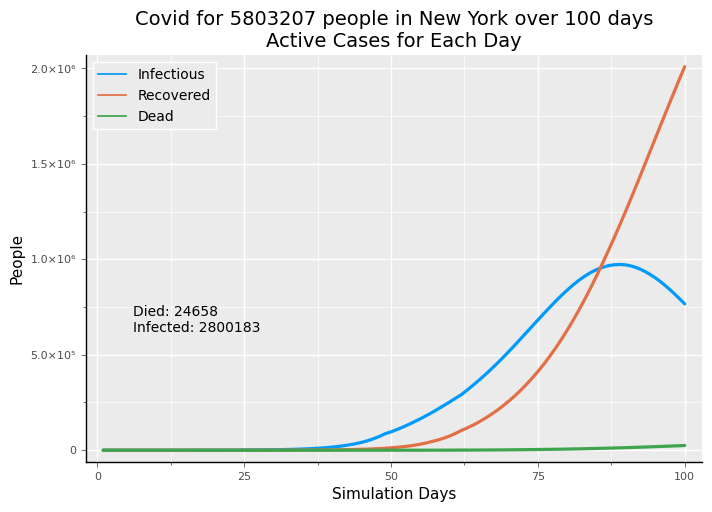

In [177]:
cumplot(series,nyc.id,[infectious, recovered, dead], geo=geo)

### Active Cases vs. Cumulative Total Cases

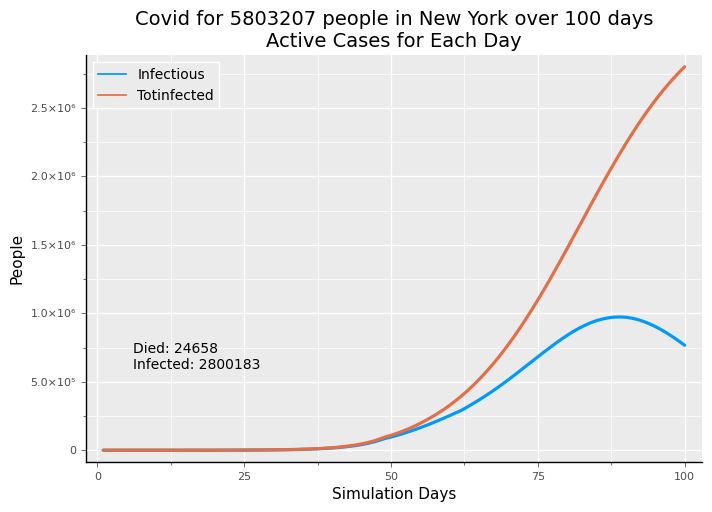

In [178]:
cumplot(series,nyc.id,[infectious, totinfected], geo=geo)

### Simulation vs. Reported Total Cases

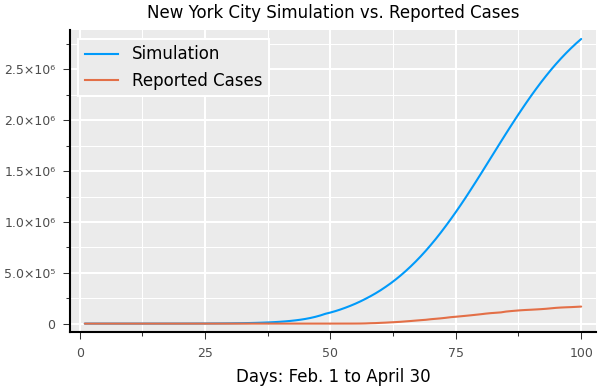

In [179]:
plot(1:100, series[nyc.id][:cum][:,map2series.totinfected[6]], label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:100, tricities[:,:nyc_infected], label="Reported Cases",dpi=150, size=(400,260), tickfontsize=6)
title!("New York City Simulation vs. Reported Cases", titlefontsize=8)
xlabel!("Days: Feb. 1 to April 30", guidefontsize=8)


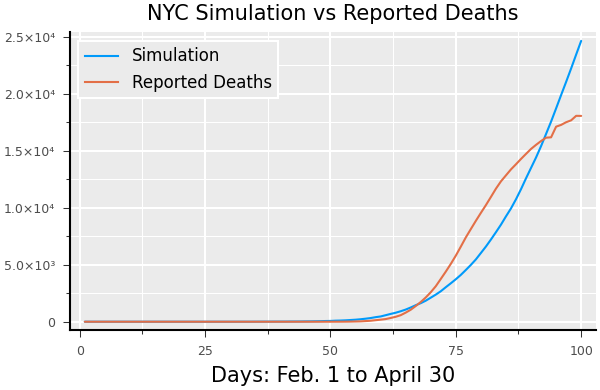

In [180]:
plot(1:100, series[nyc.id][:cum][:,map2series.dead[6]], label="Simulation",dpi=150, size=(400,260), tickfontsize=6)
plot!(1:100, tricities[:,:nyc_dead], label="Reported Deaths",dpi=150, size=(400,260), tickfontsize=6)
title!("NYC Simulation vs Reported Deaths", titlefontsize=10)
xlabel!("Days: Feb. 1 to April 30", guidefontsize=10)